In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def tridiag (a1,a2,a3,n):
    A=np.zeros([n,n])
    b=np.zeros(n)
    for i in range (n) :
        A[i,i]=a1
        b[i]=2
        if i>0 :
            A[i,i-1] = a3
        if i< n-1 :
            A[i,i+1] = a2
    return A,b

In [3]:
tridiag(4,1,1,10)

(array([[4., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 4., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 4., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 4., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 4., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 4., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 4., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 4., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 4., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 4.]]),
 array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]))

In [4]:
def matrice_diag_dominante(B):
    diag = np.diag(B)
    n = len(B)
    resultat = False
    for i in range(n):
        if( abs(diag[i]) > (np.sum(abs(B[i]))-abs(B[i,i])) ):
            resultat = True
        else : 
            resultat =False
    return resultat
        

In [5]:
matrice_diag_dominante(tridiag(4,1,1,10)[0])

True

In [6]:
matrice_diag_dominante(tridiag(1,1,1,10)[0])

False

In [11]:
def jacobi(B, b1, X0, epsilon) :
    if not matrice_diag_dominante(B):
        print(" B n’est pas à diagonale strictement dominante.")
    else :
        n=0
        M=np.diagflat(np.diag(B))
        N = M-B
        INV_M = np.linalg.inv(M)
        while np.linalg.norm(B.dot(X0)-b1) > epsilon:
            n+=1
            X0=INV_M.dot(N.dot(X0))+INV_M.dot(b1)
        return X0,n
        
        
    

In [16]:
B=tridiag(4,1,1,10)[0]
b1=tridiag(1,1,1,10)[1]
x0=np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])
epsilon=10**(-6)
jacobi(B,b1,x0,epsilon)

(array([[0.42264915, 0.42264915, 0.42264915, 0.42264915, 0.42264915,
         0.42264915, 0.42264915, 0.42264915, 0.42264915, 0.42264915],
        [0.30940345, 0.30940345, 0.30940345, 0.30940345, 0.30940345,
         0.30940345, 0.30940345, 0.30940345, 0.30940345, 0.30940345],
        [0.33973712, 0.33973712, 0.33973712, 0.33973712, 0.33973712,
         0.33973712, 0.33973712, 0.33973712, 0.33973712, 0.33973712],
        [0.33164815, 0.33164815, 0.33164815, 0.33164815, 0.33164815,
         0.33164815, 0.33164815, 0.33164815, 0.33164815, 0.33164815],
        [0.33367039, 0.33367039, 0.33367039, 0.33367039, 0.33367039,
         0.33367039, 0.33367039, 0.33367039, 0.33367039, 0.33367039],
        [0.33367039, 0.33367039, 0.33367039, 0.33367039, 0.33367039,
         0.33367039, 0.33367039, 0.33367039, 0.33367039, 0.33367039],
        [0.33164815, 0.33164815, 0.33164815, 0.33164815, 0.33164815,
         0.33164815, 0.33164815, 0.33164815, 0.33164815, 0.33164815],
        [0.33973712, 0.3397

In [17]:
print( np.linalg.solve(B, b1))

[0.42264914 0.30940344 0.33973711 0.33164813 0.33367037 0.33367037
 0.33164813 0.33973711 0.30940344 0.42264914]


In [30]:
def  gauss_seidel(B, b1, X0, epsilon) : 
    if not matrice_diag_dominante(B):
        print(" B n’est pas à diagonale strictement dominante.")
    else :
        n=0
        D = np.tril(B)
        INV_D = np.linalg.inv(D)
        N= D-B
        X1 = INV_D.dot(N.dot(X0)+b1) 
        while (np.linalg.norm(X1-X0) > epsilon):
            n+=1
            X0=X1
            X1 = INV_D.dot(N.dot(X0)+b1)
        return X0,n


In [31]:
B=tridiag(4,1,1,10)[0]
b1=tridiag(1,1,1,10)[1]
x0=np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])
epsilon=10**(-6)
gauss_seidel(B,b1,x0,epsilon)

(array([[0.42264899, 0.42264899, 0.42264899, 0.42264899, 0.42264899,
         0.42264899, 0.42264899, 0.42264899, 0.42264899, 0.42264899],
        [0.30940366, 0.30940366, 0.30940366, 0.30940366, 0.30940366,
         0.30940366, 0.30940366, 0.30940366, 0.30940366, 0.30940366],
        [0.3397369 , 0.3397369 , 0.3397369 , 0.3397369 , 0.3397369 ,
         0.3397369 , 0.3397369 , 0.3397369 , 0.3397369 , 0.3397369 ],
        [0.33164829, 0.33164829, 0.33164829, 0.33164829, 0.33164829,
         0.33164829, 0.33164829, 0.33164829, 0.33164829, 0.33164829],
        [0.33367028, 0.33367028, 0.33367028, 0.33367028, 0.33367028,
         0.33367028, 0.33367028, 0.33367028, 0.33367028, 0.33367028],
        [0.33367043, 0.33367043, 0.33367043, 0.33367043, 0.33367043,
         0.33367043, 0.33367043, 0.33367043, 0.33367043, 0.33367043],
        [0.3316481 , 0.3316481 , 0.3316481 , 0.3316481 , 0.3316481 ,
         0.3316481 , 0.3316481 , 0.3316481 , 0.3316481 , 0.3316481 ],
        [0.33973712, 0.3397

In [32]:
%timeit gauss_seidel(B,b1,x0,epsilon)

215 µs ± 29.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [33]:
%timeit jacobi(B,b1,x0,epsilon) # fundtion l9itha aal internet t7seb 9adeh el function tched wa9et

370 µs ± 8.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [68]:
def jacobiAndGsWithArrayEps(): 
    eps=[10**-3,10**-6,10**-9,10**-12]
    n=10
    array_jacobi=[]
    array_Gs=[]
    for e in eps :
        j=jacobi(B,b1,x0,e)
        gs=gauss_seidel(B,b1,x0,e)
        array_jacobi.append(j[1]) # nbr d'iteration
        array_Gs.append(gs[1]) # nbr d'iteration
    return eps,array_jacobi,array_Gs
    

In [69]:
jacobiAndGsWithArrayEps()

([0.001, 1e-06, 1e-09, 1e-12], [15, 24, 34, 43], [6, 11, 17, 21])

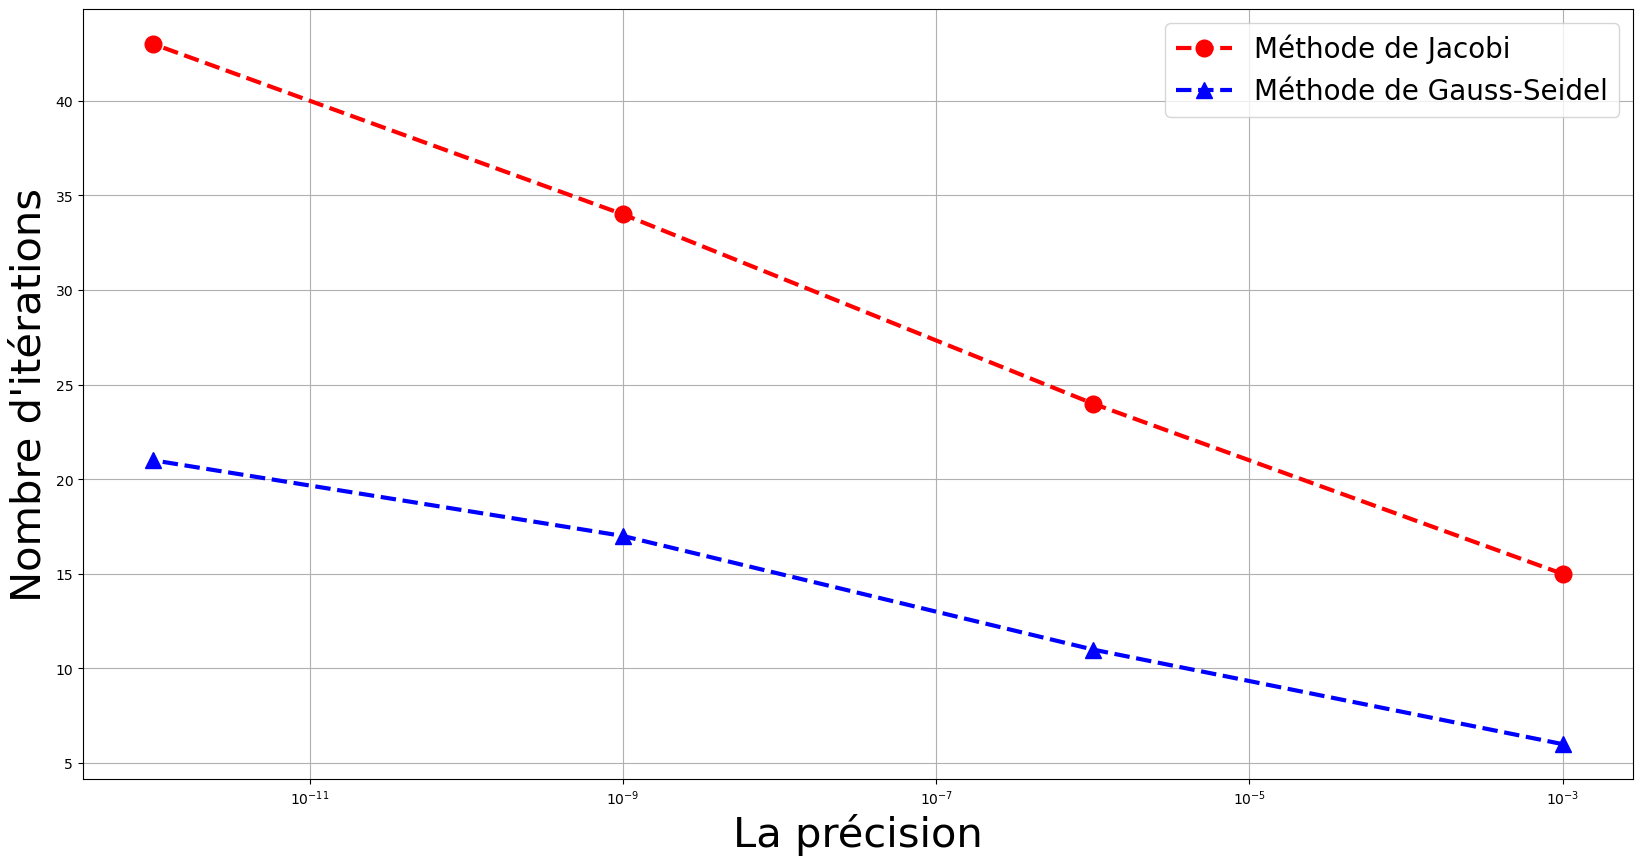

In [73]:
plt.figure(figsize=(20,10))
plt.plot(jacobiAndGsWithArrayEps()[0],jacobiAndGsWithArrayEps()[1],'ro--',jacobiAndGsWithArrayEps()[0],jacobiAndGsWithArrayEps()[2],'b^--', linewidth=3,markersize=12) 
plt.xscale('log')
plt.xlabel('La précision',fontsize=30)
plt.ylabel('Nombre d\'itérations',fontsize=30)
plt.legend(('Méthode de Jacobi','Méthode de Gauss-Seidel'),fontsize=20, loc = 0) 
plt.grid(True)

In [70]:
def Niter(epsilon):
    N=np.arange(5,31,5)
    Niter_J=[]
    Niter_GS=[]
    for n in N:
        Ab=tridiag(4,1,1,n)
        X0=np.ones((n,1))
        J=jacobi(Ab[0],Ab[1],X0,epsilon)
        GS=gauss_seidel(Ab[0],Ab[1],X0,epsilon)
        Niter_J.append(J[1])
        Niter_GS.append(GS[1])
    return Niter_J, Niter_GS


In [71]:
Niter(10**-6)

([20, 24, 26, 26, 27, 27], [10, 11, 12, 12, 12, 12])